In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/HR_comma_sep.csv.txt')

In [28]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [19]:
# Check for missing values
print(df.isnull().sum())

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


In [21]:
# Remove the irrelevant columns
df = df.drop(['Work_accident'], axis=1)

In [32]:
# Convert categorical variables into numerical variables using one-hot encoding
df = pd.get_dummies(df, columns=['sales', 'salary'])

In [34]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [35]:
# Transform the data
scaler = StandardScaler()
df[['average_montly_hours', 'number_project']] = scaler.fit_transform(df[['average_montly_hours', 'number_project']])

In [36]:
# Convert categorical variables to numerical variables
le = LabelEncoder()
df['average_montly_hours'] = le.fit_transform(df['average_montly_hours'])
df['number_project'] = le.fit_transform(df['number_project'])

In [37]:
# Split the data into training and testing datasets
X = df.drop('left', axis=1)
y = df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [39]:
# Train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [40]:
# Predict on the test set
y_pred = rf.predict(X_test)

In [41]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.988
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



<AxesSubplot:xlabel='left', ylabel='count'>

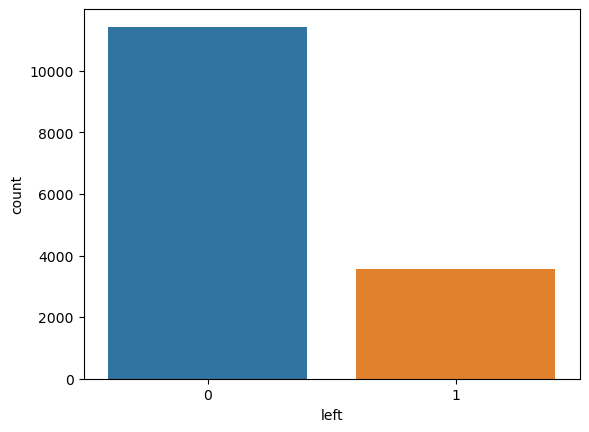

In [42]:
# Check the distribution of the 'left' target column
sns.countplot(x='left', data=df)

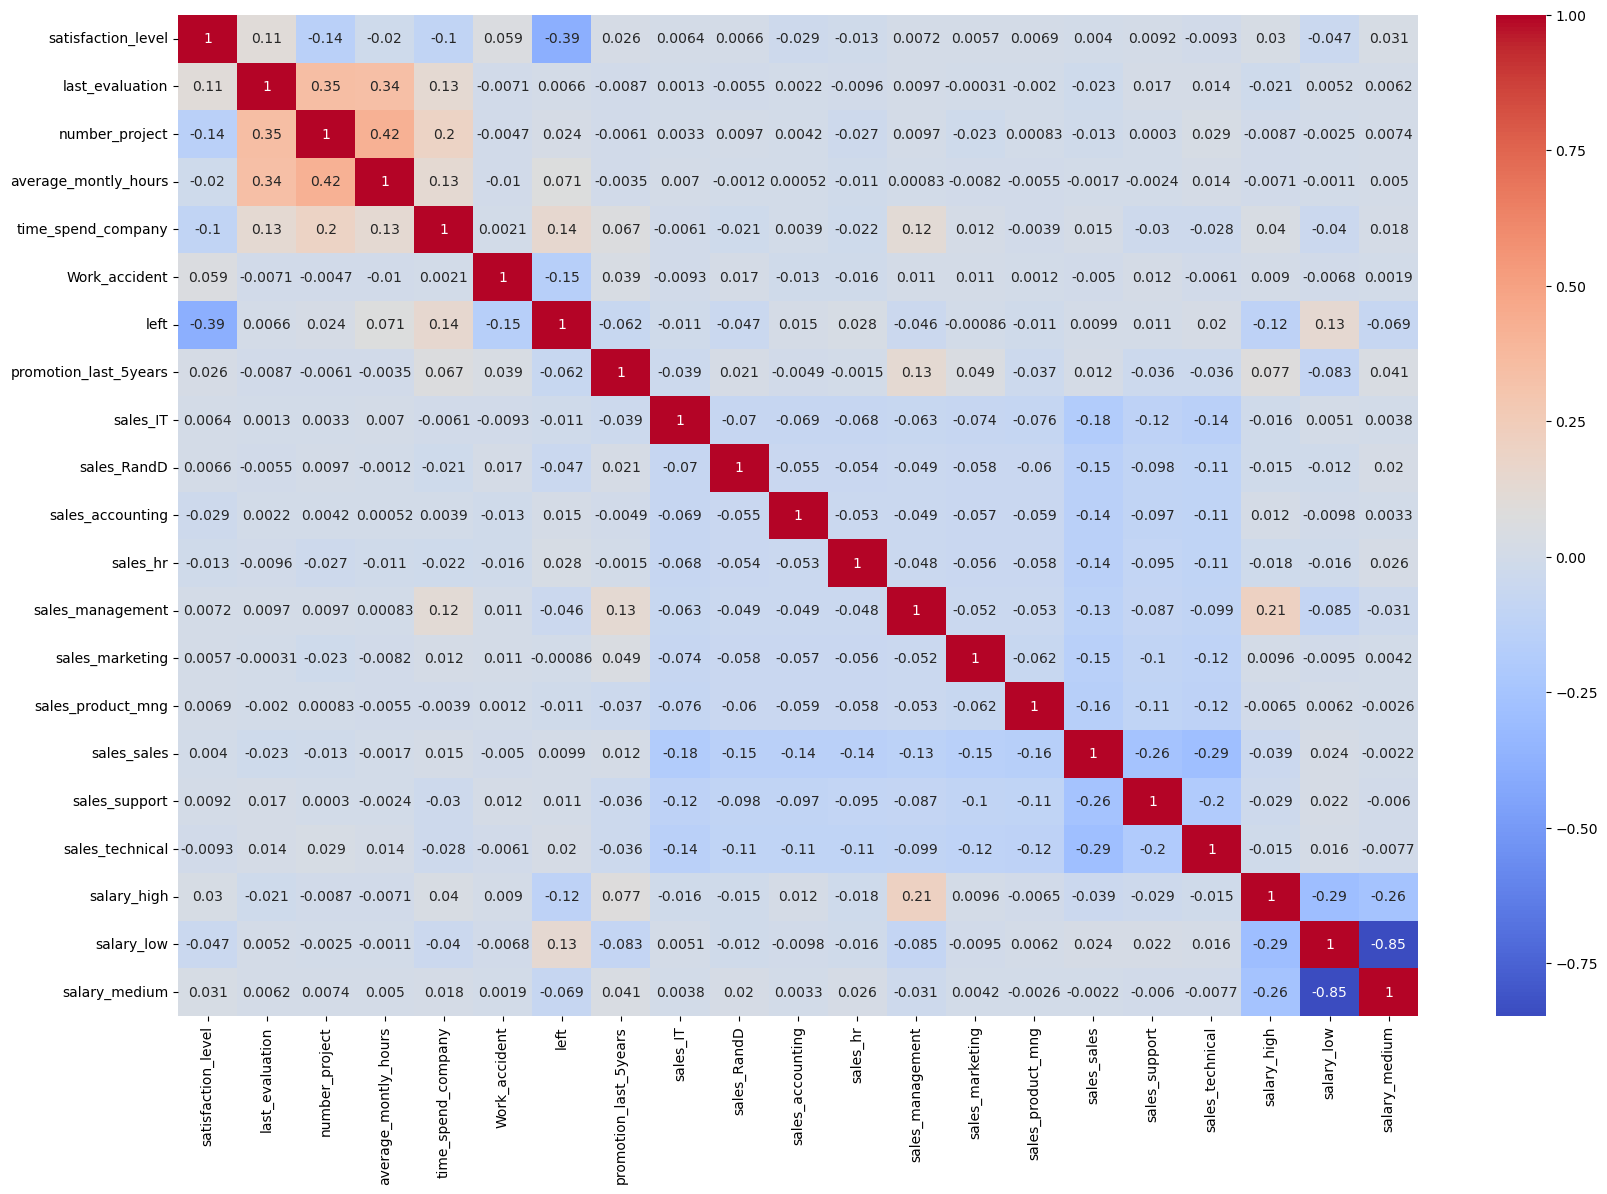

In [45]:
# Check the correlation between features and the target column
corr = df.corr()
plt.figure(figsize=(20, 13))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

<AxesSubplot:xlabel='left', ylabel='time_spend_company'>

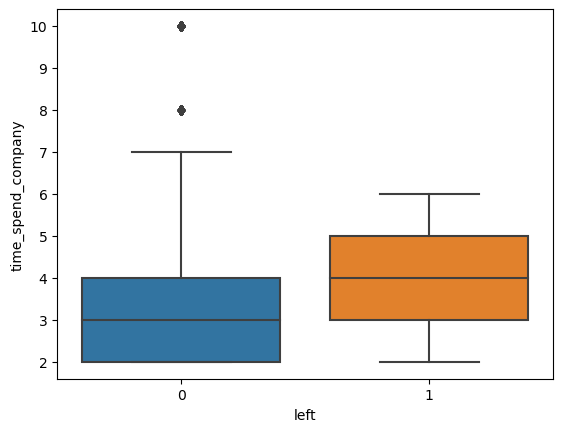

In [46]:
# Check the distribution of 'time_spend_company' for employees who left vs. those who stayed
sns.boxplot(x='left', y='time_spend_company', data=df)